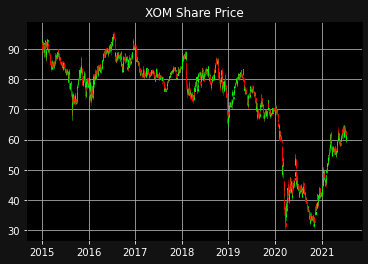

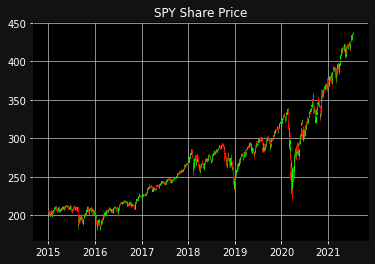

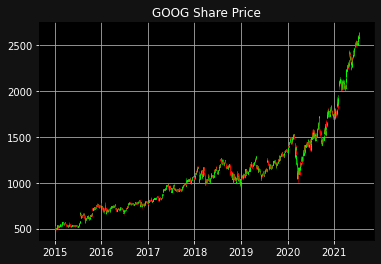

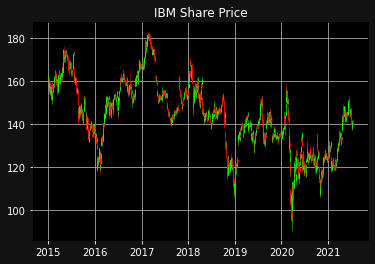

In [ ]:
# Imports
from tkinter import *
from tkcalendar import DateEntry
import datetime as dt

import pandas_datareader as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

'''
Function for visualizing stock data
Using Candlestick Charts
'''
def visualize():

    # Get Dates From DateEntry and Convert It To Datetime
    from_date = cal_from.get_date()
    to_date = cal_to.get_date()

    start = dt.datetime(from_date.year, from_date.month, from_date.day)
    end = dt.datetime(to_date.year, to_date.month, to_date.day)

    # Load Ticker From Entry And Download Data
    ticker = text_ticker.get()
    data = web.DataReader(ticker, 'yahoo', start, end)

    # Restructure Data Into OHLC Format
    data = data[['Open', 'High', 'Low', 'Close']]

    # Reset Index And Convert Dates Into Numerical Format
    data.reset_index(inplace=True)
    data['Date'] = data['Date'].map(mdates.date2num)

    # Adjust Style Of The Plot
    ax = plt.subplot()
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.set_title('{} Share Price'.format(ticker), color='white')
    ax.figure.canvas.manager.set_window_title('Stock Visualizer v0.1 Alpha')
    ax.set_facecolor('black')
    ax.figure.set_facecolor('#121212')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.xaxis_date()

    # Plot The Candlestick Chart
    candlestick_ohlc(ax, data.values, width=0.5, colorup='#00ff00')
    plt.show()

# Define Main Window
root = Tk()
root.title("Stock Visualizer v0.1 Alpha")

# Add Components And Link Function
label_from = Label(root, text="From:")
label_from.pack()
cal_from = DateEntry(root, width=50, year=2010, month=1, day=1)
cal_from.pack(padx=10, pady=10)

label_to = Label(root, text="To:")
label_to.pack()
cal_to = DateEntry(root, width=50)
cal_to.pack(padx=10, pady=10)

label_ticker = Label(root, text="Ticker Symbol:")
label_ticker.pack()
text_ticker = Entry(root)
text_ticker.pack()

btn_visualize = Button(root, text="Visualize", command=visualize)
btn_visualize.pack()

root.mainloop()